<a href="https://colab.research.google.com/github/shineloveyc/Small_ML_Projects/blob/master/NY_Times_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 200)

In [ ]:
#load the data of New York Times home page visits 
path1= 'http://stat.columbia.edu/~rachel/datasets/nyt1.csv'
path2 = 'http://stat.columbia.edu/~rachel/datasets/nyt2.csv'
path3 = 'http://stat.columbia.edu/~rachel/datasets/nyt3.csv'
path4 = 'http://stat.columbia.edu/~rachel/datasets/nyt4.csv'
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
df3 = pd.read_csv(path3)
df4 = pd.read_csv(path4)

In [ ]:
df_all = pd.concat([df1, df2, df3, df4])

In [ ]:
df_all.describe()

,Age,Gender,Impressions,Clicks,Signed_In
count,1.791603e+06,1.791603e+06,1.791603e+06,1.791603e+06,1.791603e+06
mean,2.947300e+01,3.694423e-01,5.001741e+00,9.255454e-02,7.002718e-01
std,2.363329e+01,4.826539e-01,2.236188e+00,3.099879e-01,4.581390e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00
50%,3.100000e+01,0.000000e+00,5.000000e+00,0.000000e+00,1.000000e+00
75%,4.800000e+01,1.000000e+00,6.000000e+00,0.000000e+00,1.000000e+00
max,1.110000e+02,1.000000e+00,2.000000e+01,6.000000e+00,1.000000e+00


In [ ]:
#since we don't care data without impression, remove it
#also remove data without impression but have click==>data wrong
df_clean = df_all[df_all['Impressions']>0]

In [ ]:
def create_group(age):
  if age < 18:
    group = '<18'
  elif age<=24 and age>=18:
    group = '18-24'
  elif age<=34 and age>=25:
    group = '25-34'
  elif age <=44 and age >=35:
    group = '35-44'
  elif age <= 54 and age>=45:
    group = '45-54'
  elif age <=64 and age >=55:
    group = '55-64'
  else:
    group = '65+'
  return group

In [ ]:
df_clean['age_group'] = df_clean['Age'].apply(create_group)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#summarize information by age group
print(df_clean.groupby('age_group').describe().unstack(1))

                    age_group
Age          count  18-24        157751.000000
                    25-34        225102.000000
                    35-44        273119.000000
                    45-54        249424.000000
                    55-64        174650.000000
                    65+          111957.000000
                    <18          587531.000000
             mean   18-24            20.840248
                    25-34            29.502301
                    35-44            39.500456
                    45-54            49.498015
                    55-64            59.495122
                    65+              72.968390
                    <18               1.405521
             std    18-24             1.860932
                    25-34             2.629890
                    35-44             2.632346
                    45-54             2.629481
                    55-64             2.627753
                    65+               6.066072
                    <18       

In [ ]:
df_clean['CTR'] = df_clean.Clicks/df_clean.Impressions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


tried to use altair to draw to graph, but row numbers too large than altair can't process

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
sns.set(rc={'figure.figsize':(15,8.27)})
sns.set(style="ticks", palette="pastel")

Text(0, 0.5, 'Density')

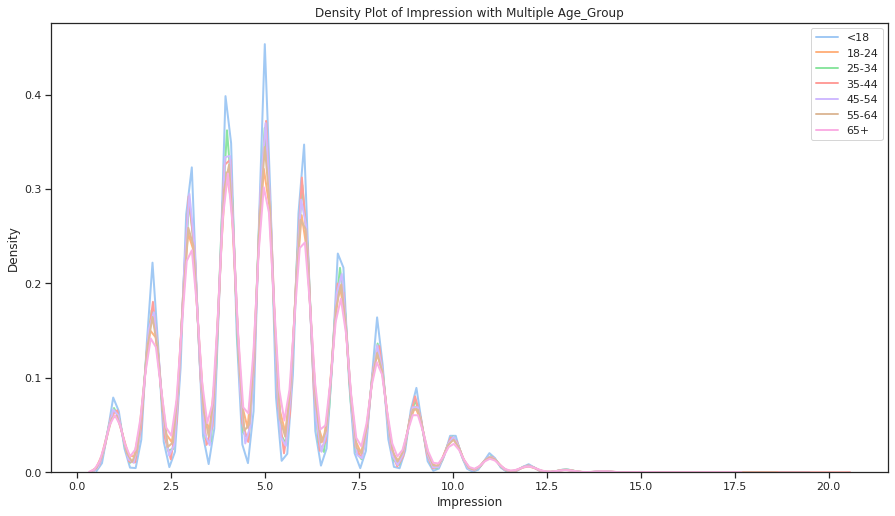

In [ ]:
#plot the distribution of number of impression 
# List of five airlines to plot
age_groups = ['<18','18-24','25-34','35-44','45-54','55-64','65+']

# Iterate through the five airlines
for age_group in age_groups:
    # Subset to the age group
    subset = df_clean[df_clean['age_group'] == age_group]
    
    # Draw the density plot, 'shade': True
    sns.distplot(subset['Impressions'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = age_group)
    
# Plot formatting
plt.title('Density Plot of Impression with Multiple Age_Group')
plt.xlabel('Impression')
plt.ylabel('Density')

Text(0.5, 1.0, 'Density Plot of CTR with Multiple Age_Group')

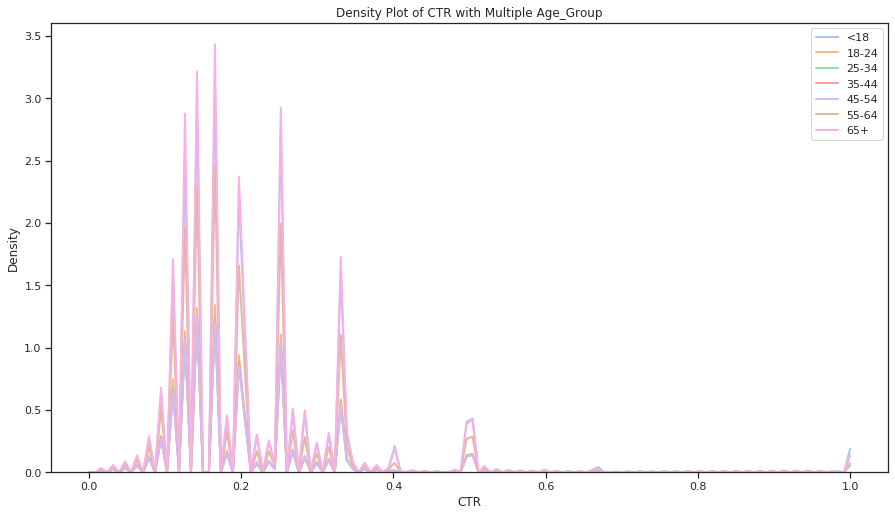

In [ ]:
#plot the distribution of number of CTR
for age_group in age_groups:
  subset = df_clean[df_clean['age_group'] == age_group]

  sns.distplot(subset['CTR'], hist = False, kde=True, kde_kws={'linewidth': 2}, label=age_group)

#prop==>The font properties of the legend.
plt.legend=age_groups
plt.xlabel('CTR')
plt.ylabel('Density')
plt.title('Density Plot of CTR with Multiple Age_Group')

Looks like impression is high among teenager but CTR is high among older people, which means the as may target the wrong group?

Text(0.5, 1.0, 'Boxplot of Impression across age groups by signed or not signed')

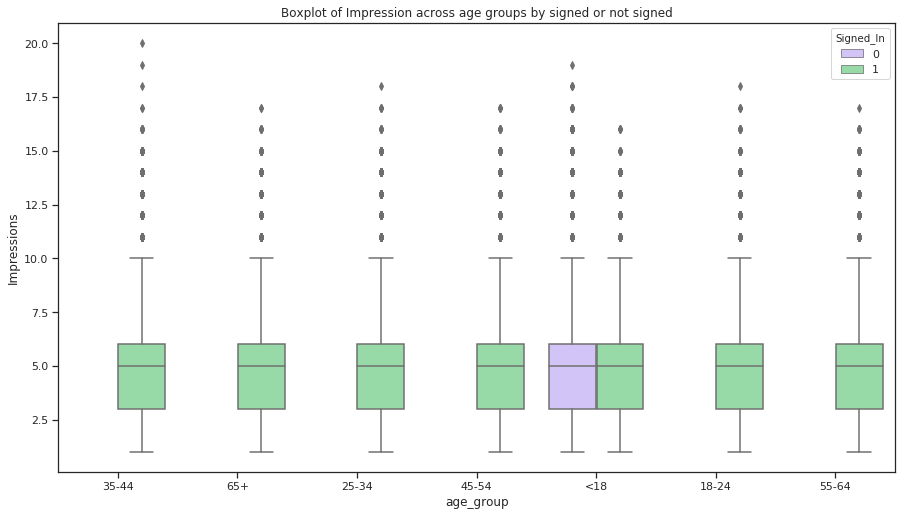

In [ ]:
#using boxplot to further explore the data
sns.boxplot(x = 'age_group', y = 'Impressions', hue='Signed_In', palette=['m', 'g'], data = df_clean)
plt.title('Boxplot of Impression across age groups by signed or not signed')

Text(0.5, 1.0, 'Boxplot of CTR across age groups by signed or not signed')

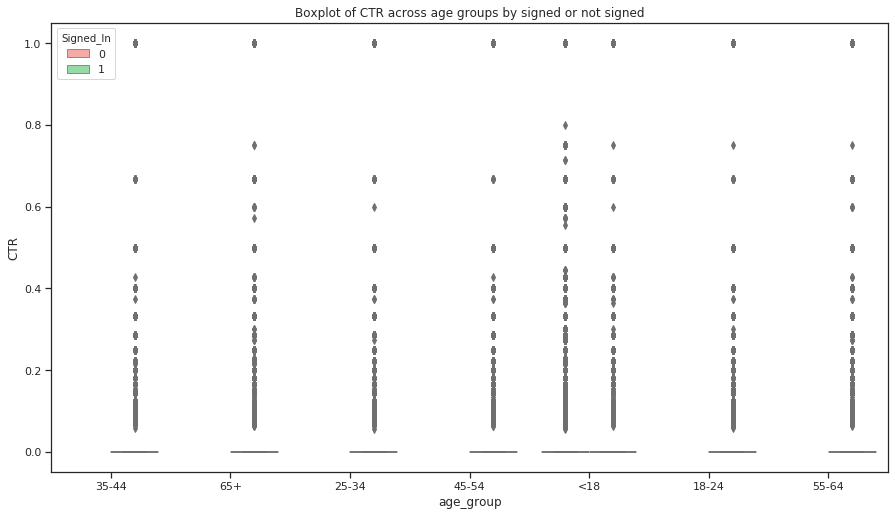

In [ ]:
sns.boxplot(x = 'age_group', y = 'CTR', hue = 'Signed_In', data=df_clean, palette=['r', 'g'])
plt.title('Boxplot of CTR across age groups by signed or not signed')

In [ ]:
df_clean.describe()

,Age,Gender,Impressions,Clicks,Signed_In,CTR
count,1.779534e+06,1.779534e+06,1.779534e+06,1.779534e+06,1.779534e+06,1.779534e+06
mean,2.947336e+01,3.694265e-01,5.035663e+00,9.318226e-02,7.002575e-01,1.847151e-02
std,2.363355e+01,4.826497e-01,2.205364e+00,3.109433e-01,4.581452e-01,6.905027e-02
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.100000e+01,0.000000e+00,5.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,4.800000e+01,1.000000e+00,6.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,1.110000e+02,1.000000e+00,2.000000e+01,6.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
#create new categorical segment variable
df_clean['imps'] = [1 if i >0 else 0 for i in df_clean['Impressions']]
df_clean['clicked'] = [1 if i >0 else 0 for i in df_clean['Clicks']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Boxplot of CTR across age groups by signed or not signed')

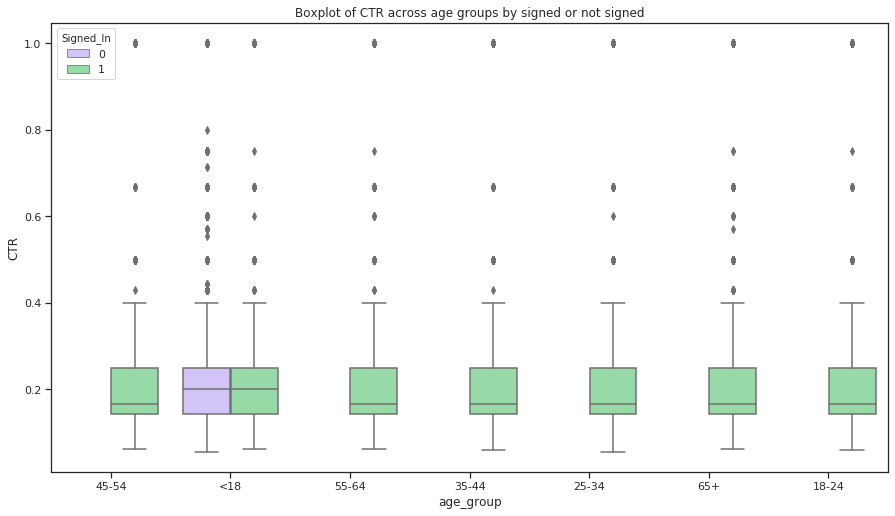

In [ ]:
#check the CTR with only clicked user
sns.boxplot(x = 'age_group', y = 'CTR', hue = 'Signed_In', data=df_clean[df_clean['clicked']==1], palette=['m', 'g'])
plt.title('Boxplot of CTR across age groups by signed or not signed')

Among those who signed, age<18 has higher CTR rate

Text(0.5, 1.0, 'Boxplot of CTR across age groups by signed or not signed')

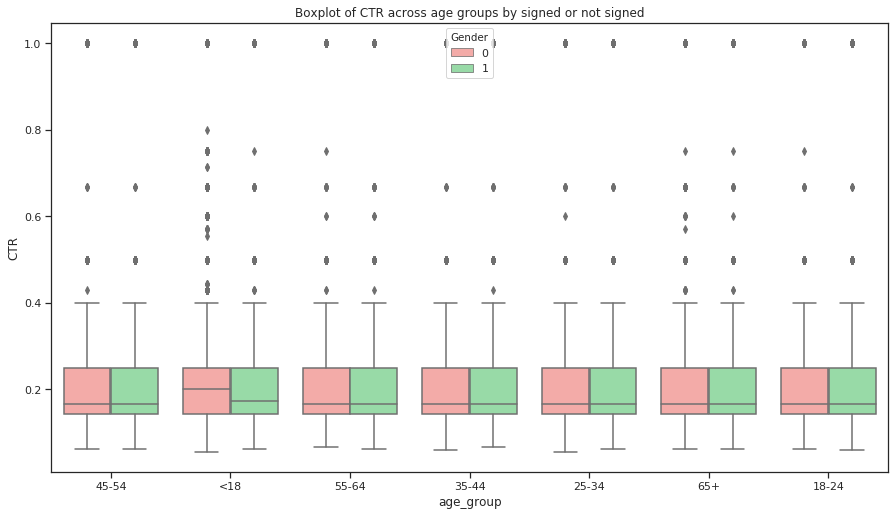

In [ ]:
#check the CTR with only clicked user by gender
sns.boxplot(x = 'age_group', y = 'CTR', hue = 'Gender', data = df_clean[df_clean['clicked']==1], palette=['r', 'g'])
plt.title('Boxplot of CTR across age groups by signed or not signed')

Among those who clicked, age group <18 and female has high CTR rate